In [29]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import pyfar as pf
%matplotlib inline

In [30]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join("C:\\Users\\jotag\\OneDrive - Universita' degli Studi della Campania Luigi Vanvitelli\\jasapaper")

### figure formatting

In [31]:
font={
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
    "font.size": 12,
}



plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(3,2))
    plt.grid()
    return figure, ax

def create_fig2():
    figure,ax = plt.subplots(figsize=(5,3))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

tlabel="$$rt \\quad [\\mathrm{s}]$$"
mlabel="peak memory [MiB]"
mlegend=["baking", "propagation","collection"]
tlegend=["baking", "propagation","collection","total"]

In [32]:
# get file from
with open(os.path.join(SRC_DIR,"urban_canyon_with_mem_.json")) as json_file:
    dat = json.load(json_file)

## time step

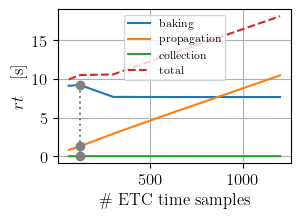

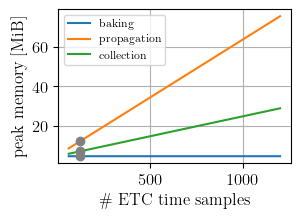

In [33]:
t = np.array(dat["time_step"]["t"])[:,1:]
d = np.array(dat["time_step"]["data"])
m = np.array(dat["time_step"]["mem"])[:,1:,1]/1024**2
n = 1.2/d

i = np.argwhere(n==120)[0]

# f,a=create_fig()
# plt.plot(d*1000,t)
# plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones_like(t.T[:,i]),t.T[:,i],'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8)
plt.show()
export_fig(fn,filename="time_samples_rt")

# fm,a=create_fig()
# plt.plot(d*1000,m)
# plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8)
plt.show()

export_fig(fmn,filename="time_samples_mem")

## BRDF resolution

C:\Users\jotag\AppData\Local\Temp\ipykernel_20912\1969311751.py:6: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(dd)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order


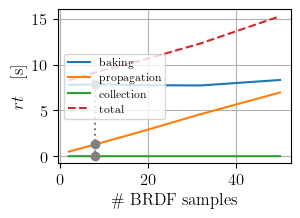

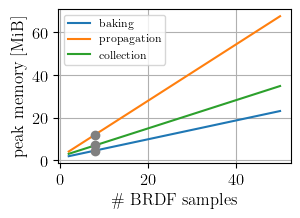

In [34]:
t = np.array(dat["brdf_resolution"]["t"])[:,1:]
d = np.array(dat["brdf_resolution"]["data"])
m = np.array(dat["brdf_resolution"]["mem"])[:,1:,1]/1024**2
n=[]
for dd in d:
    samples = pf.samplings.sph_gaussian(dd)
    n.append(samples[np.where((samples.elevation*180/np.pi >= 0))].cshape[0])

n=np.array(n)

# f,a=create_fig()
# plt.plot(d[1:],t[1:])
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones_like(t.T[:,i]),t.T[:,i],'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc='center left')
plt.show()

export_fig(fn,filename="BRDF_samples_rt")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8)
plt.show()

export_fig(fmn,filename="BRDF_samples_mem")


## reflection order

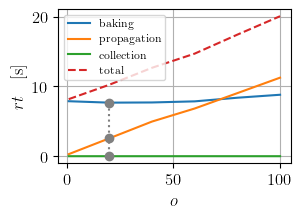

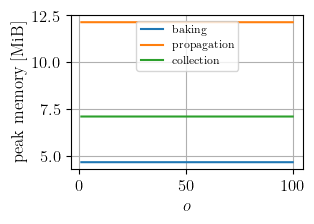

In [35]:
t = np.array(dat["reflection_order"]["t"])[:,1:]
d = np.array(dat["reflection_order"]["data"])
m = np.array(dat["reflection_order"]["mem"])[:,1:,1]/1024**2

f,a=create_fig()
plt.plot(d,t)
plt.plot(d,np.sum(t,axis=1),'--')
plt.plot(d[i]*np.ones_like(t.T[:,i]),t.T[:,i],'o:', color='gray')
plt.xlabel("$$o$$")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8)
plt.show()

export_fig(f,filename="order_rt")

fm,a=create_fig()
plt.plot(d,m)
#plt.plot(d[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("$$o$$")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8)
plt.show()

export_fig(fm,filename="order_mem")

## patch size

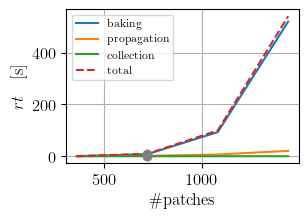

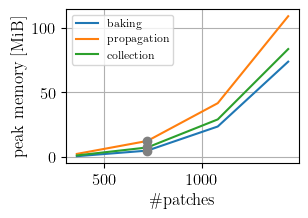

In [36]:
t = np.array(dat["patch_size"]["t"])[:,1:]
d = np.array(dat["patch_size"]["data"])
m = np.array(dat["patch_size"]["mem"])[:,1:,1]/1024**2
n = (6*2+12)*90/d

n=np.array(n)

# f,a=create_fig()
# plt.semilogx(d,t)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones_like(t.T[:,i]),t.T[:,i],'o:', color='gray')
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8)
plt.show()

export_fig(fn,filename="patches_rt")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fm,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8)
plt.show()

export_fig(fm,filename="patches_mem")

## proof of concept

In [38]:
etcs = pf.io.read(os.path.join(SRC_DIR,"proof_etcs_.far"))

In [39]:
custom=etcs["custom_etc"]
diff = etcs["diffuse_etc"]

print(etcs["freqs"])

[ 500 1000 2000]


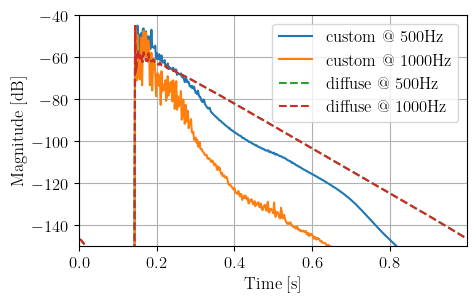

In [40]:
f,a=create_fig2()
pf.plot.time(custom[:,0:2], dB=True, log_prefix=10,
             label=["custom @ 500Hz","custom @ 1000Hz"],
             linestyle="-")
pf.plot.time(diff[:,0:2], dB=True, log_prefix=10,
             label=["diffuse @ 500Hz","diffuse @ 1000Hz"],
             linestyle="--")
plt.legend()
plt.xlabel("Time  [s]")
plt.ylabel("Magnitude [dB]")
plt.ylim([-150,-40])

export_fig(f,filename="etcs")